# Tyson1991

This model is described in the article:

- J.J. Tyson, "Modeling the cell division cycle: cdc2 and cyclin interactions.", Proc. Natl. Acad. Sci. U.S.A., 88(16), 7328-32, 1991.

Abstract:
The proteins cdc2 and cyclin form a heterodimer (maturation promoting factor) that controls the major events of the cell cycle. A mathematical model for the interactions of cdc2 and cyclin is constructed. Simulation and analysis of the model show that the control system can operate in three modes: as a steady state with high maturation promoting factor activity, as a spontaneous oscillator, or as an excitable switch. We associate the steady state with metaphase arrest in unfertilized eggs, the spontaneous oscillations with rapid division cycles in early embryos, and the excitable switch with growth-controlled division cycles typical of nonembryonic cells.

In [1]:
%matplotlib inline
from ecell4 import *

In [2]:
with reaction_rules():
    YT = Y + YP + M + pM
    CT = C2 + CP + M + pM

    ~Y > Y | 0.015 / CT
    Y > ~Y | 0.0 * Y
    CP + Y > pM | 200.0 * CP * Y / CT
    pM > M | pM * (0.018 + 180 * ((M / CT) ** 2))
    M > pM | 0.0 * M
    M > C2 + YP | 1.0 * M
    YP > ~YP | 0.6 * YP
    C2 > CP | 1000000.0 * C2
    CP > C2 | 1000.0 * CP

m = get_model()

In [3]:
for rr in m.reaction_rules():
    print(rr.as_string())

C2+CP+M+pM>Y+C2+CP+M+pM|(0.015/(C2+CP+M+pM))
Y>|(0.0*Y)
CP+Y+C2+M>pM+C2+M|((200.0*CP*Y)/(C2+CP+M+pM))
pM+C2+CP>M+C2+CP|(pM*(0.018+(180*((M/(C2+CP+M+pM))**2))))
M>pM|(0.0*M)
M>C2+YP|(1.0*M)
YP>|(0.6*YP)
C2>CP|(1000000.0*C2)
CP>C2|(1000.0*CP)


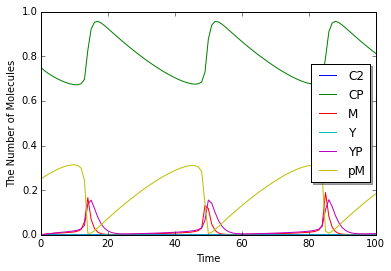

In [4]:
run_simulation(100.0, model=m, y0={'CP': 0.75, 'pM': 0.25})